## Exercise 4.2 Python Code for Queue Analysis

A popular fast food restaurant is planning to open a branch in a new location and wants to decide how many servers to hire. To help them, write a function "avQueueLength" with two input parameters:

- k: the number of customers that can be served in a minute. (assumed to be integer)
- demand: a list of integers specifying how many customers arrive each minute. (For simplicity, assume that customers arrive at the beginning of each minute and up to k customers can be served instantly.)

The function should return (not print) the average queue length.

**Sample run:**
```python
avQueueLength(3,[2,3,6,8,10,2,1,0,1,0])
```

**Output:**
```
7.2
```

The following table summarizes the evolution of the queue corresponding to the above sample input.

| Minute | # of Arrivals | # Served | Queue Length| 
| -- | -- | -- | -- |
| 0  | -- | -- | 0  |
| 1  | 2  | 2  | 0  |
| 2  | 3  | 3  | 0  |
| 3  | 6  | 3  | 3  |
| 4  | 8  | 3  | 8  |
| 5  | 10 | 3  | 15 |
| 6  | 2  | 3  | 14 |
| 7  | 1  | 3  | 12 | 
| 8  | 0  | 3  | 9  |
| 9  | 1  | 3  | 7  |
| 10 | 0  | 3  | 4  |
| **Average** | -- | -- | **7.2** |


## Solutions

**Steps 1 and 2.** See part a) of the in-class exercise.

**Step 3. Analyze:** For each part of the instructions above, plan how you would carry them out using Python. For the trickest parts, write fragments of runnable Python code to implement them, while creating sample intermediate inputs to test each fragment separately on the computer. 

In [11]:
rem = []
arrivals = [2,3,6,8,10,2,1,0,1,0]
served = 3
for i in arrivals:
    print('Minute:',arrivals.index(i)+1)
    print('Arrivals:',i)
    print('Served:',min(i,3))
    print('Queue Length',max(0,i-3),'\n')
    rem.append(i-3 if i-3 >= 0 else 0)
for i in range(len(rem)):
    print(f'Queue length at minute {i+1}: {rem[i]}')

Minute: 1
Arrivals: 2
Served: 2
Queue Length 0 

Minute: 2
Arrivals: 3
Served: 3
Queue Length 0 

Minute: 3
Arrivals: 6
Served: 3
Queue Length 3 

Minute: 4
Arrivals: 8
Served: 3
Queue Length 5 

Minute: 5
Arrivals: 10
Served: 3
Queue Length 7 

Minute: 1
Arrivals: 2
Served: 2
Queue Length 0 

Minute: 7
Arrivals: 1
Served: 1
Queue Length 0 

Minute: 8
Arrivals: 0
Served: 0
Queue Length 0 

Minute: 7
Arrivals: 1
Served: 1
Queue Length 0 

Minute: 8
Arrivals: 0
Served: 0
Queue Length 0 

Queue length at minute 1: 0
Queue length at minute 2: 0
Queue length at minute 3: 3
Queue length at minute 4: 5
Queue length at minute 5: 7
Queue length at minute 6: 0
Queue length at minute 7: 0
Queue length at minute 8: 0
Queue length at minute 9: 0
Queue length at minute 10: 0


In [12]:
rem = []
arrivals = [2,3,6,8,10,2,1,0,1,0]
served = 3
for i in range(len(arrivals)):
    rem.append(arrivals[i]-3 if arrivals[i]-3 >= 0 else 0)
    if i != len(arrivals)-1:
        arrivals[i+1] += max(0,arrivals[i]-3)
rem

[0, 0, 3, 8, 15, 14, 12, 9, 7, 4]

In [13]:
print(sum(rem)/len(rem))

7.2


**Step 4. Synthesize:** Following the instructions from Step 2 and the code fragments from Step 3, write complete Python code to implement the instructions and solve the problem. You should do this in an incremental fashion and print intermediate outputs as you go to make sure that each part of the code matches your expectations.

In [14]:
# Code with intermediate printing, without function declaration.
def avQueueLength(k,demand):
    temp = demand[:]
    print('Minute\tArrival\tServed\tQueue')
    rem = []
    for i in range(len(temp)):
        rem.append(temp[i]-k if temp[i]-k >= 0 else 0)
        if i != len(temp)-1:
            temp[i+1] += max(0,temp[i]-k)
            print(f'{i+1}\t{temp[i]}\t{min(temp[i],k)}\t{temp[i+1]}')
    return(sum(rem)/len(rem))
avQueueLength(3,[2,3,6,8,10,2,1,0,1,0])

Minute	Arrival	Served	Queue
1	2	2	3
2	3	3	6
3	6	3	11
4	11	3	18
5	18	3	17
6	17	3	15
7	15	3	12
8	12	3	10
9	10	3	7


7.2

In [15]:
# Final code
def avQueueLength(k,demand):
    temp = demand[:]
    rem = []
    for i in range(len(temp)):
        rem.append(temp[i]-k if temp[i]-k >= 0 else 0)
        if i != len(temp)-1:
            temp[i+1] += max(0,temp[i]-k)
    return(round(sum(rem)/len(rem),1))

In [16]:
# Test code 1
avQueueLength(3,[2,3,6,8,10,2,1,0,1,0])

7.2

In [17]:
# Test code 2
demand=[2,3,6,8,10,2,1,0,1,0]
for k in range(1,6):
    print(f'Av. Queue Length with {k} server(s):',avQueueLength(k,demand))

Av. Queue Length with 1 server(s): 17.2
Av. Queue Length with 2 server(s): 11.7
Av. Queue Length with 3 server(s): 7.2
Av. Queue Length with 4 server(s): 4.0
Av. Queue Length with 5 server(s): 2.2


To illustrate why the above function is useful, according to a mathematical result known as Little's Law, the average queuing time of customers is 

$$\frac{\text{Average Queue Length}}{\text{Average Arrival Rate}}=\frac{7.2}{3.3} \approx 2.2 \text{ minutes.}$$

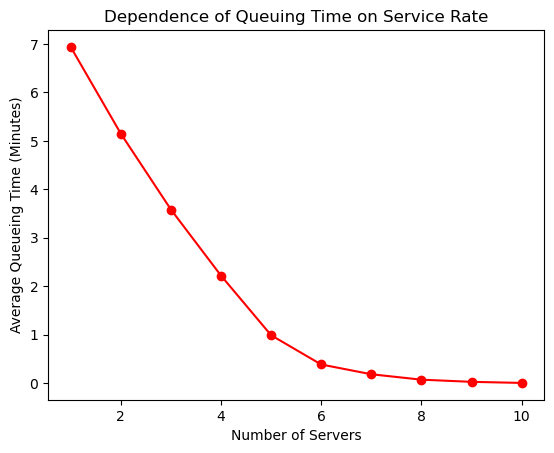

In [18]:
# Test code 3
demand=[2,3,6,8,10,8,4,3,2,6,3,2,1,4,5]
servers=range(1,11)
avArrivalRate=sum(demand)/len(demand)
queuingTime=[avQueueLength(k,demand)/avArrivalRate for k in servers]
import matplotlib.pyplot as plt
plt.plot(servers,queuingTime,'ro-')
plt.xlabel('Number of Servers')
plt.ylabel('Average Queueing Time (Minutes)')
plt.title('Dependence of Queuing Time on Service Rate')
plt.show()